# Train test split


In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn import  metrics

Rozważmy następujący zbiór punktów:

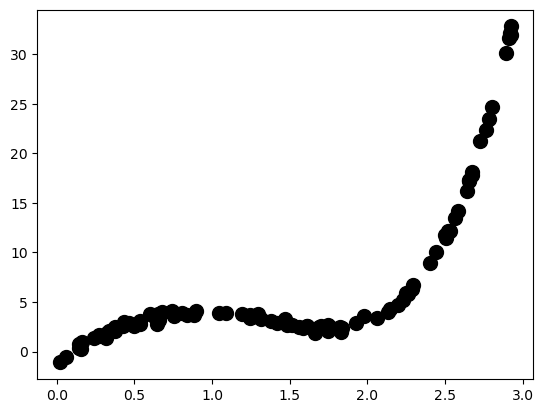

In [2]:
x = stats.uniform(0,3).rvs(100)
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
y = f(x) + stats.norm(0,0.3).rvs(len(x))
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Przykład
Podziel zbiór danych na część testową i treningową. 
Naucz model na części treningowej i ocen wyniki na części testowej.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60,) (60,)
(40,) (40,)


In [4]:
X_train=np.vstack(X_train)
X_test=np.vstack(X_test)

In [5]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(X_train, y_train)
model2.predict(X_test)

array([21.679406  ,  3.08878256, 24.25170842,  3.45560553,  4.54976969,
       21.26691144,  2.40143392,  3.03313843, 13.71164394,  0.94323376,
        1.55582692, 11.11064855,  4.6164705 ,  6.57470061,  5.54624046,
        2.68622737,  3.74220102, 15.60494168,  4.23062922,  0.85353211,
       10.79280716,  1.92341407, 20.07110341,  3.43142571,  2.40297375,
        1.87761824,  4.65338648,  0.82444057, 10.24996953,  3.21133299,
       11.81919328,  4.07197001,  3.44194877,  4.58138091, 16.0516998 ,
        1.22108157,  3.04784144, 17.10112078,  2.07684143,  5.42343741])

In [6]:
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y_test, model2.predict(X_test)) ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y_test, model2.predict(X_test)) ))
print("Mean squared error: {}".format( metrics.mean_squared_error(y_test, model2.predict(X_test)) ))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y_test, model2.predict(X_test)) ))

Explained variance score: 0.8359550166467966
Explained variance score: 0.8359550166467966
Median absolute error: 2.1390717688675505
Mean squared error: 9.324958140623869
Mean absolute errors: 2.5563746944364754


# Zadanie
Wylicz powyższe miary na zbiorze testowym dla wszystkich modeli nauczonych na trainie:

- regrsji linowej
- regrsji wielomianowej stopnia 2
- regrsji wielomianowej stopnia 3
- regrsji wielomianowej stopnia 4
- regrsji wielomianowej stopnia 5
- regrsji wielomianowej stopnia 25

LR: nan (nan)
PR2: nan (nan)
PR3: nan (nan)
PR4: nan (nan)
PR5: nan (nan)
PR25: nan (nan)


/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 662, in fit
    X, y = self._validate_data(
  File "/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_par

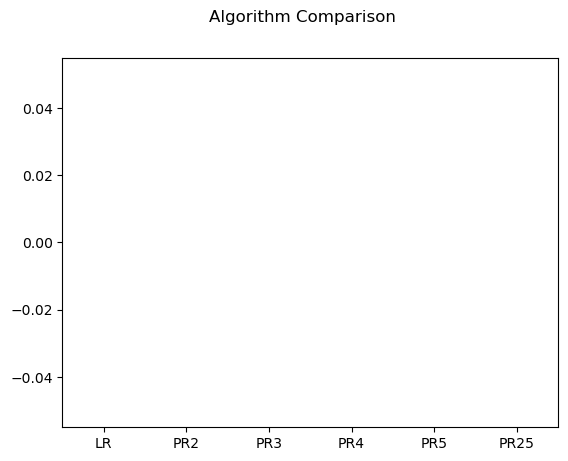

In [22]:
import sklearn.model_selection 
from sklearn.model_selection  import cross_val_score
models = []
models.append(('LR', linear_model.LinearRegression()))
models.append(('PR2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('PR3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('PR4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('PR5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('PR25', make_pipeline(PolynomialFeatures(25), linear_model.LinearRegression()) ))

results = []
names = [] 

seed=123
kfold = KFold(n_splits=10)
scoring = 'neg_mean_absolute_error'

for name, model in models:
    cv_results = cross_val_score(model, x, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()  